In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import aklab.mpls as mpl # https://github.com/queezz/aklab

In [75]:
%run -n ../tmap7.py

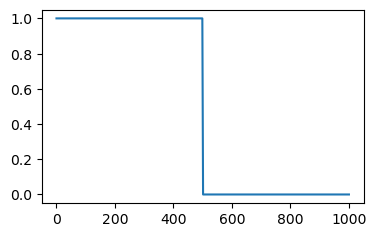

In [76]:
#mpl.font_setup(size=14)
mpl.figprep(width=300)
n = 400
t = np.linspace(0,1000,n)
pressure = np.linspace(1,1,n)
# pressure[200:] = 0.5
pressure[200:] = 0
# pressure[:100] = 
plt.plot(t,pressure)

In [77]:
%run -n ../tmap7.py
piranipath = os.path.abspath('../pirani.dat')
writePirani((t,pressure), piranipath)

<Figure size 432x288 with 0 Axes>

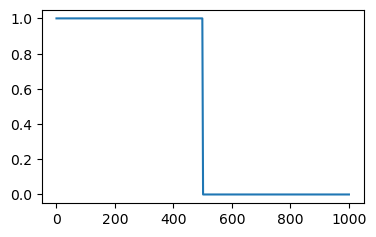

In [78]:
mpl.figprep(width=300)
p = pd.read_csv(os.path.abspath('../pirani.dat'),names=['time','p'])
plt.plot(p['time'],p['p'])

# Check TMAP7 class

run finished
{'ksubd': 1e+16, 'ku': 5e-31, 'kd': 2e-31, 'dif': False, 'temp': 900, 'tstep': 0.1}


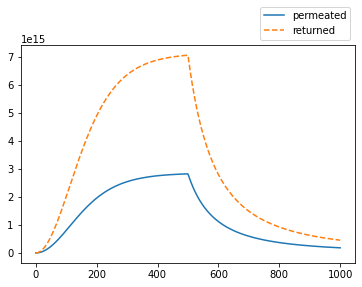

In [25]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
# False means using an initial input
parameters = {
    "ksubd" : 1e16,
    "ku" : 5e-31,
    "kd" : 2e-31,
    "dif" : False,
    "temp" : 900,
    "tstep" : 0.1 # Must not be False
}
t7.prep_parameters(parameters,"../template.inp")
t7.run()
t7.plot()
print(t7.parameters)

run finished
{'ksubd': 1e+18, 'ku': False, 'kd': False, 'dif': False, 'temp': 900, 'tstep': 0.1}


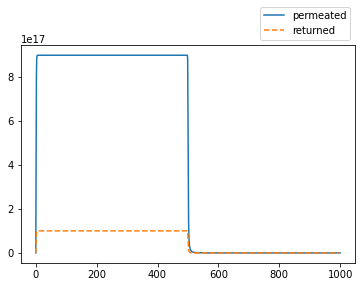

In [56]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
# False means using an initial input
parameters = {
    "ksubd" : 1e18,
    "ku" : False,
    "kd" : False,
    "dif" : False,
    "temp" : 900,
    "tstep" : 0.1 # Must not be False
}
t7.prep_parameters(parameters,"../template2.inp")
t7.run()
t7.plot()
print(t7.parameters)

# Loop

In [49]:
from time import sleep

In [67]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
js = []
kus = [1e-31,1e-30,2e-30,5e-30,1e-29]
difs = [1e-7,1e-8,1e-9,1e-10,1e-11,1e-13]
ts = [300,400,500,600,700,800]
for x in difs:
    parameters = {
        "ksubd" : 1e18,
        "ku" : False,
        "kd" : False,
        "dif" : x,
        "temp" : False,
        "tstep" : 0.1
    }
    t7.prep_parameters(parameters,"../template2.inp")
    t7.run()     
    #t7.plot()
    #print(t7.parameters)
    #print(f'{t7.data[:,2].max():.2e}\t{t7.gamma.max():.2e}')
    js.append(t7.gamma)

js = np.array(js)

run finished
run finished
run finished
run finished
run finished
run finished


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ni permeeation')

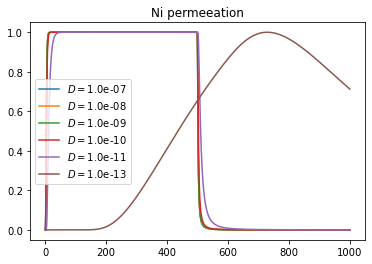

In [71]:
[plt.plot(t7.t,js[i]/js[i].max(),label=f'$D=${x:.1e}') for i,x in enumerate(difs)]
plt.legend()
plt.title('Ni permeeation')
# plt.xlim(0,10)
